<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Juan Ospina
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial
<br>
<i><b>Tema:</b></i> DFS y BFS
<br>
<i><b>Estudiantes</b></i> 
  <li>Juan Esteban Arias </li>
  <li>Hugo Andres Espinosa</li>
  <li>Juan Camilo Hernandez Ibañez</li>

</FONT>
</div>

# __Laboratorio 2: Búsqueda no informada__

El siguiente taller de corresponde a la aplicación de algoritmos de búsqueda no informada en la solución de problemas en inteligencia artificial. Para el desarrollo del laboratorio tenga en cuenta lo siguiente:

* La actividad puede realizarse en grupos de máximo 4 personas
* La solución al taller debe enviarse en un notebook a través de Moodle. Se debe adjuntar el archivo. No se aceptan enlaces
* El objetivo del taller es hacer énfasis en el proceso de modelamiento. Por esta razón se deben utilizar como base para la soluciones propuestas las clases y métodos disponibles en la sección recursos. __Otras implementaciones no serán tenidas en cuenta__.
* Si se detecta cualquier tipo de fraude, la calificación de 0.0.
* El taller deberá ser sustentando por uno de los miembros del grupo
* Las soluciones propuestas deben cumplir con las recomendaciones de código limpio especificadas en el [PEP8](https://pep8.org/), de lo contrario será penalizado

## __0. Recursos__

La clase abstracta `SearchProblem` servirá como una plantilla general para el proceso de formulación del problema como un problema de búsqueda. Cualquier implementación deberá heredar de esta clase

In [ ]:
import matplotlib.pyplot as plt

class SearchProblem(object):
    def __init__(self, initial, goal=None, **kwds): 
        self.initial = initial
        self.goal = goal

    def actions(self, node):     
        raise NotImplementedError
        
    def result(self, node, action): 
        raise NotImplementedError
        
    def is_goal(self, node):  
        return self.goal == node
    
    def action_cost(self, s, a, s1): 
        return 1

También es posible implementar la clase abstracta `Node` para representar los posibles estados del problemas.

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):   
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]
    
    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]        

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False    

    def __repr__(self):
        return self.state  

Una implementación de los algoritmos `BFS` y `DFS` tal como se vió en clase.

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

closed_BFS = []

def BFS(problem, fringe=[]):
  
    fringe.append(problem.initial)

    while True:
        node = fringe.pop(0)
        if node not in closed_BFS:
            closed_BFS.append(node)    
            if problem.is_goal(node):
                return node
            for child in expand(problem, node):
                fringe.append(child)


closed_DFS = []

def DFS(problem, fringe=[]):

    fringe.append(problem.initial)

    while True:

        node = fringe.pop()
        if node not in closed_DFS:
            closed_DFS.append(node)
            if problem.is_goal(node):
                return node
            for child in expand(problem, node):
                fringe.append(child)


## __1. (1.5 puntos) Problema de las Jarras de agua__

Usted tiene 2 jarras, una con capacidad de 3 litros y otra con capacidad de 5 litros. Además, cuenta con un grifo el cuál puede utilizar para llenar las jarras cuando lo requiera. Las jarras se pueden llenar totalmente o vaciar su contenido en el piso. También se puede vaciar el contenido de una jarra en la otra. Las jarras no tienen ninguna clase de marca. El objetivo es medir exactamente cuatro litros de agua. Considere el estado inicial como tener las dos jarras vacias.

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar las jarras
* Encuentre la solución al problema utilizando los algoritmos BFS y DFS
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos


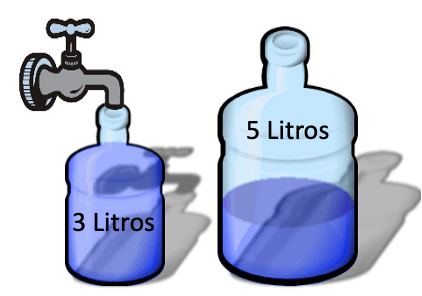




In [ ]:
class GrafoJarras(SearchProblem):  
  def actions(self, node):
      actions = {
          "(3,5)": ["llenar(3,0)","llenar(0,5)"],
          "(0,0)": ["llenar(3,0)","llenar(0,5)"],
          "(3,0)": ["mover(0,3)","mover(0,0)","mover(3,5)"], 
          "(0,5)": ["mover(3,2)","mover(0,0)","mover(3,5)"],
          "(0,3)": ["llenar(3,0)","mover(0,0)","llenar(0,5)","mover(3,3)"],
          "(3,2)": ["llenar(0,5)","mover(0,2)","llenar(3,0)","mover(3,5)"],
          "(3,3)": ["mover(0,3)","llenar(3,0)","mover(1,5)","mover(3,5)"],
          "(0,2)": ["mover(0,0)","mover(2,0)","mover(3,2)","llenar(0,5)"],
          "(1,5)": ["llenar(0,5)","mover(1,0)","mover(3,5)","mover(3,3)"],
          "(2,0)": ["mover(0,0)","mover(0,2)","mover(2,5)","llenar(3,0)"],
          "(1,0)": ["llenar(3,0)","mover(0,0)","mover(0,1)","mover(1,5)"],
          "(2,5)": ["mover(3,5)","mover(2,0)","llenar(0,5)","mover(3,4)"],
          "(3,4)": ["mover(0,4)","llenar(3,0)","mover(2,5)","mover(3,5)"],
          "(0,1)": ["mover(0,0)","mover(3,1)","llenar(0,5)","mover(1,0)"],
          "(3,1)": ["mover(0,1)","llenar(3,0)","mover(0,4)","mover(3,5)"]
      }
      return actions[node.state]

  def result(self, node, action):
    new_state = {
      "mover(0,0)": "(0,0)",
      "llenar(3,0)": "(3,0)",
      "llenar(0,5)": "(0,5)",
      "mover(0,3)": "(0,3)",
      "mover(3,5)": "(3,5)",
      "mover(3,2)": "(3,2)",
      "mover(3,3)": "(3,3)",
      "mover(0,2)": "(0,2)",
      "mover(1,5)": "(1,5)",
      "mover(2,0)": "(2,0)",
      "mover(1,0)": "(1,0)",
      "mover(2,5)": "(2,5)",
      "mover(3,4)": "(3,4)",
      "mover(0,1)": "(0,1)",
      "mover(3,1)": "(3,1)",
      "mover(0,4)": "(0,4)",
        }
    return Node(state=new_state[action], parent=node, action=action)

  def is_goal(self, node):
    return node == self.goal

In [ ]:
S = Node(state="(0,0)")  # Estado Inicial
G = Node(state="(0,4)")  # Estado Objetivo

nuevo_grafo = GrafoJarras(initial=S, goal=G)

solucion_BFS = BFS(nuevo_grafo) 
solucion_DFS = DFS(nuevo_grafo)  

print("Estado Inicial: ",S)
print("Estado Objetivo: ",G)

print("\n-----------------------------")
print("******* Algoritmo DFS *******")
print("-----------------------------\n")

print('Secuencia de estados: ',solucion_DFS.states_path())
print('Secuencia de acciones:',solucion_DFS.actions_path())
print('Acciones realizadas: ',len(solucion_DFS.actions_path()))

print("\n-------------------------------")
print("******* Algoritmo BFS *********")
print("-------------------------------\n")

print('Secuencia de estados: ',solucion_BFS.states_path())
print('Secuencia de acciones: ',solucion_BFS.actions_path())
print('Acciones realizadas: ',len(solucion_BFS.actions_path()))

Estado Inicial:  (0,0)
Estado Objetivo:  (0,4)

-----------------------------
******* Algoritmo DFS *******
-----------------------------

Secuencia de estados:  [(0,0), (0,5), (3,5), (3,0), (0,3), (3,3), (1,5), (1,0), (0,1), (3,1), (0,4)]
Secuencia de acciones: ['llenar(0,5)', 'mover(3,5)', 'llenar(3,0)', 'mover(0,3)', 'mover(3,3)', 'mover(1,5)', 'mover(1,0)', 'mover(0,1)', 'mover(3,1)', 'mover(0,4)']
Acciones realizadas:  10

-------------------------------
******* Algoritmo BFS *********
-------------------------------

Secuencia de estados:  [(0,0), (0,5), (3,2), (0,2), (2,0), (2,5), (3,4), (0,4)]
Secuencia de acciones:  ['llenar(0,5)', 'mover(3,2)', 'mover(0,2)', 'mover(2,0)', 'mover(2,5)', 'mover(3,4)', 'mover(0,4)']
Acciones realizadas:  7


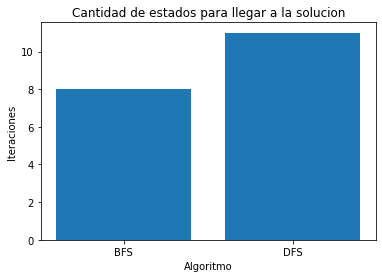

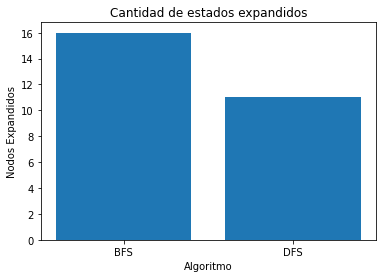

In [ ]:
plt.title("Cantidad de estados para llegar a la solucion")
plt.xlabel("Algoritmo")
plt.ylabel("Iteraciones")
plt.bar(["BFS","DFS"], [len(solucion_BFS.states_path()), len(solucion_DFS.states_path())])
plt.show()

plt.title("Cantidad de estados expandidos")
plt.xlabel("Algoritmo")
plt.ylabel("Nodos Expandidos")
plt.bar(["BFS","DFS"],[len(closed_BFS),len(closed_DFS)])
plt.show()

## __2. (2.0 puntos) Canibales y misioneros__

Tres misioneros y tres caníbales deben cruzar un río usando un bote que puede llevar una o dos personas. Sin embargo, para cruzar el rio se deben tener en cuenta dos restricciones: primero, si hay misioneros presentes en un lado, no pueden ser superados en número por los caníbales (¡si esto ocurriera, los caníbales se comerían a los misioneros!). Segundo, el barco no puede cruzar el río vacio. Su objetivo es modelar esta situación como un problema de búsqueda y resolverlo usando BFS y DFS. Para esto:

* Construya una clase que herede de la clase `SearchProblem` para representar el problema
* Construya una clase que herede de la clase `Node` para representar los estados
* Genere un gráfico de barras donde compare la cantidad de nodos expandidos por ambos algoritmos

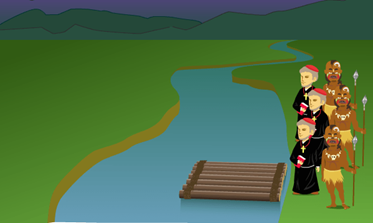


In [ ]:
class GrafoCanibales(SearchProblem):
    def actions(self, node):
        actions = {
            # (Posicion del bote, Izq Canibales, Der Canibales, Izq Misioneros, Der Misioneros)
            "(I,1,2,0,3)" : ["ir(D,0,3,0,3)"],
            "(I,1,2,1,2)" : ["ir(D,1,2,0,3)"],
            "(I,2,1,0,3)" : ["ir(D,1,2,0,3)","ir(D,0,3,0,3)"],
            "(I,3,0,0,3)" : ["ir(D,2,1,0,3)","ir(D,1,2,0,3)"],
            "(D,2,1,0,3)" : ["ir(I,2,1,2,1)","ir(I,3,0,0,3)"],
            "(I,2,1,2,1)" : ["ir(D,1,2,1,2)","ir(D,2,1,0,3)"],  
            "(D,1,2,1,2)" : ["ir(I,2,1,2,1)","ir(I,1,2,3,0)"],
            "(I,1,2,3,0)" : ["ir(D,0,3,3,0)","ir(D,1,2,1,2)"],
            "(D,0,3,3,0)" : ["ir(I,1,2,3,0)","ir(I,2,1,3,0)"],
            "(I,2,1,3,0)" : ["ir(D,0,3,3,0)","ir(D,1,2,3,0)"],
            "(D,1,2,3,0)" : ["ir(I,2,1,3,0)","ir(I,3,0,3,0)"],
            "(I,3,0,3,0)" : ["ir(D,1,2,3,0)","ir(D,2,1,2,1)"],
            "(D,1,2,0,3)" : ["ir(I,1,2,1,2)","ir(I,3,0,0,3)","ir(I,2,1,0,3)"],
            "(D,0,3,0,3)" : ["ir(I,2,1,0,3)","ir(I,1,2,0,3)","ir(I,1,2,1,2)"]
        }
        return actions[node.state]

    def result(self, node, action):
        new_state = {
            "ir(D,0,3,0,3)" : "(D,0,3,0,3)",
            "ir(I,2,1,0,3)" : "(I,2,1,0,3)",
            "ir(I,1,2,0,3)" : "(I,1,2,0,3)",
            "ir(I,1,2,1,2)" : "(I,1,2,1,2)",
            "ir(D,1,2,0,3)" : "(D,1,2,0,3)",
            "ir(I,3,0,0,3)" : "(I,3,0,0,3)",
            "ir(D,2,1,0,3)" : "(D,2,1,0,3)",
            "ir(I,2,1,2,1)" : "(I,2,1,2,1)",  
            "ir(D,1,2,1,2)" : "(D,1,2,1,2)",
            "ir(I,1,2,3,0)" : "(I,1,2,3,0)",
            "ir(D,0,3,3,0)" : "(D,0,3,3,0)",
            "ir(I,2,1,3,0)" : "(I,2,1,3,0)",
            "ir(D,1,2,3,0)" : "(D,1,2,3,0)",
            "ir(I,3,0,3,0)" : "(I,3,0,3,0)"
        }
        return Node(state=new_state[action], parent=node, action=action)

    def is_goal(self, node):
        return node == self.goal

In [ ]:
S = Node(state='(D,0,3,0,3)')  # Estado Inicial
G = Node(state='(I,3,0,3,0)')  # Estado Objetivo

grafo_canibles = GrafoCanibales(initial=S, goal=G)

solucion_BFS = BFS(grafo_canibles)
solucion_DFS = DFS(grafo_canibles)  

print("Estado Inicial: ",S)
print("Estado Objetivo: ",G)

print("\n-----------------------------")
print("******* Algoritmo DFS *******")
print("-----------------------------\n")

print('Secuencia de estados: ',solucion_DFS.states_path())
print('Secuencia de acciones:',solucion_DFS.actions_path())
print('Acciones realizadas: ',len(solucion_DFS.actions_path()))

print("\n-------------------------------")
print("******* Algoritmo BFS *********")
print("-------------------------------\n")

print('Secuencia de estados: ',solucion_BFS.states_path())
print('Secuencia de acciones: ',solucion_BFS.actions_path())
print('Acciones realizadas: ',len(solucion_BFS.actions_path()))

Estado Inicial:  (D,0,3,0,3)
Estado Objetivo:  (I,3,0,3,0)

-----------------------------
******* Algoritmo DFS *******
-----------------------------

Secuencia de estados:  [(D,0,3,0,3), (I,1,2,1,2), (D,1,2,0,3), (I,3,0,0,3), (D,2,1,0,3), (I,2,1,2,1), (D,1,2,1,2), (I,1,2,3,0), (D,0,3,3,0), (I,2,1,3,0), (D,1,2,3,0), (I,3,0,3,0)]
Secuencia de acciones: ['ir(I,1,2,1,2)', 'ir(D,1,2,0,3)', 'ir(I,3,0,0,3)', 'ir(D,2,1,0,3)', 'ir(I,2,1,2,1)', 'ir(D,1,2,1,2)', 'ir(I,1,2,3,0)', 'ir(D,0,3,3,0)', 'ir(I,2,1,3,0)', 'ir(D,1,2,3,0)', 'ir(I,3,0,3,0)']
Acciones realizadas:  11

-------------------------------
******* Algoritmo BFS *********
-------------------------------

Secuencia de estados:  [(D,0,3,0,3), (I,2,1,0,3), (D,1,2,0,3), (I,3,0,0,3), (D,2,1,0,3), (I,2,1,2,1), (D,1,2,1,2), (I,1,2,3,0), (D,0,3,3,0), (I,2,1,3,0), (D,1,2,3,0), (I,3,0,3,0)]
Secuencia de acciones:  ['ir(I,2,1,0,3)', 'ir(D,1,2,0,3)', 'ir(I,3,0,0,3)', 'ir(D,2,1,0,3)', 'ir(I,2,1,2,1)', 'ir(D,1,2,1,2)', 'ir(I,1,2,3,0)', 'ir(D,0,3,3

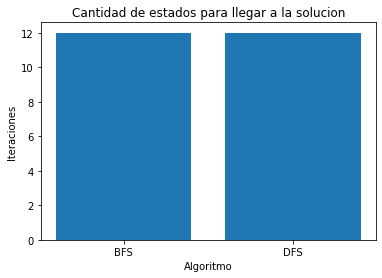

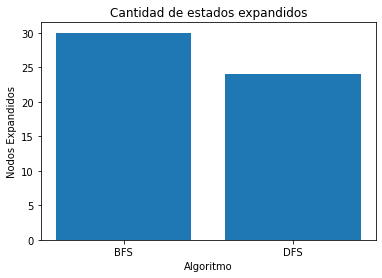

In [ ]:
plt.title("Cantidad de estados para llegar a la solucion")
plt.xlabel("Algoritmo")
plt.ylabel("Iteraciones")
plt.bar(["BFS","DFS"], [len(solucion_BFS.states_path()), len(solucion_DFS.states_path())])
plt.show()

plt.title("Cantidad de estados expandidos")
plt.xlabel("Algoritmo")
plt.ylabel("Nodos Expandidos")
plt.bar(["BFS","DFS"],[len(closed_BFS),len(closed_DFS)])
plt.show()

# __3. (1.5 puntos) Pacman__

Para el proyecto de búsqueda asociado al curso de IA de Berkeley disponible [curso de IA de Berkeley](https://inst.eecs.berkeley.edu/~cs188/sp22/project1/) resuelva:

*   Question 1 (3 points): Finding a Fixed Food Dot using Depth First Search
*   Question 2 (3 points): Breadth First Search
*   Question 3 (3 points): Varying the Cost Function


Adjunte la implementación del método de búsqueda implementado en cada caso y una imagén con la evidencia de la aprobación de los casos de prueba utilizando el método` autograder.py`


Make sure to use the Stack, Queue and PriorityQueue data structures provided to you in util.py!

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=[], cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost

### Question 1: Finding a Fixed Food Dot using Depth First Search

In [ ]:
#solucion propuesta
def depthFirstSearch(problem):
    from game import Grid
    stack = util.Stack() 
    visited = set()  
    path = []  
    parentMap = {(problem.getStartState(),'Stop',0):None} 
    stack.push((problem.getStartState(),'Stop',0))
    

    while not stack.isEmpty():
        curNode = stack.pop()
        curState = curNode[0]
        if curState in visited : continue 
        visited.add(curState)
        
        if problem.isGoalState(curState):   
            while parentMap[curNode] != None:
                path.append(curNode[1])
                curNode = parentMap[curNode]
            path.reverse()
            
            return path  

        for successor in problem.getSuccessors(curState):   
            if successor[0] not in visited:
                parentMap[successor] = curNode
                stack.push(successor)
    return False

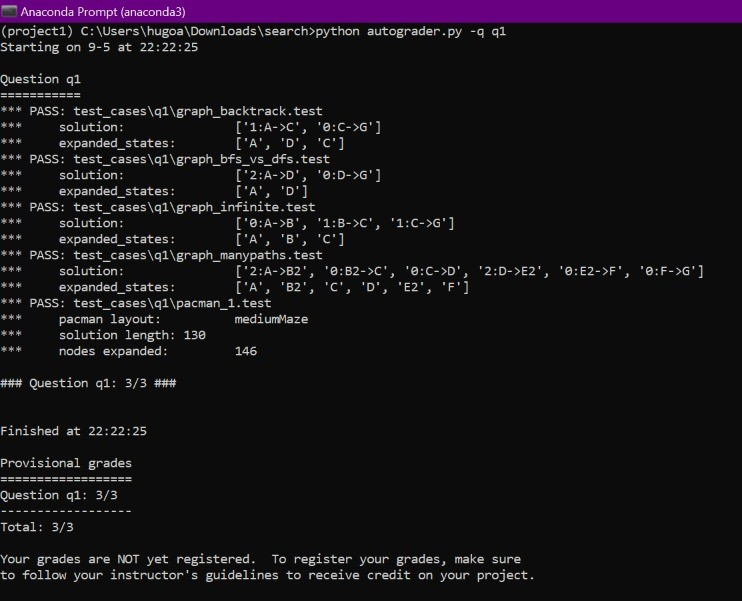![Picture title](image-20220831-195803.png)


### Question 2 (3 points): Breadth First Search

In [ ]:
# Solución propuesta
def breadthFirstSearch(problem):
    queue = util.Queue()  
    visited = set()
    path = [] 
    parentMap = {(problem.getStartState(),'Stop',0):None} 
    queue.push((problem.getStartState(),'Stop',0))
    

    while not queue.isEmpty():
        curNode = queue.pop()
        curState = curNode[0]
        if curState in visited : continue
        visited.add(curState)
        
        if problem.isGoalState(curState):
            while parentMap[curNode] != None:
                path.append(curNode[1])
                curNode = parentMap[curNode]
            path.reverse()
            
            return path 
        
        for successor in problem.getSuccessors(curState):
            if successor[0] not in visited:
                parentMap[successor] = curNode
                queue.push(successor)
        
    return False

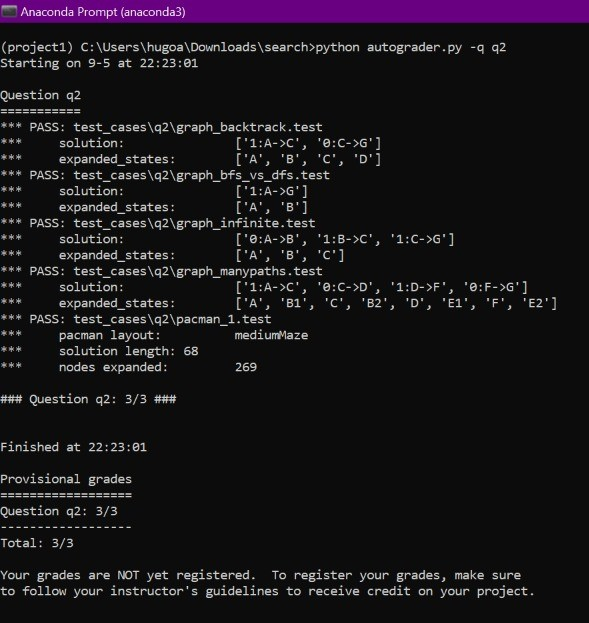

### Question 3 (3 points): Varying the Cost Function

In [ ]:
# Solución propuesta
def uniformCostSearch(problem):
    prQueue = util.PriorityQueue() 
    visited = set() 
    path = []  
    parentMap = {(problem.getStartState(),'Stop',0):None} 
    prQueue.push((problem.getStartState(),'Stop',0),0)
    costToReach = {problem.getStartState():0}  
    

    while not prQueue.isEmpty():
        curNode = prQueue.pop()
        curState = curNode[0]
        if curState in visited : continue   
        visited.add(curState)
        if problem.isGoalState(curState):   
            while parentMap[curNode] != None:
                path.append(curNode[1])
                curNode = parentMap[curNode]
            path.reverse()
            
            return path 

        for successor in problem.getSuccessors(curState):
            if successor[0] not in visited:
                parentMap[successor] = curNode
                costToReach[successor[0]] = successor[2] + costToReach[curNode[0]]
                prQueue.push(successor, costToReach[successor[0]]) 
    return False

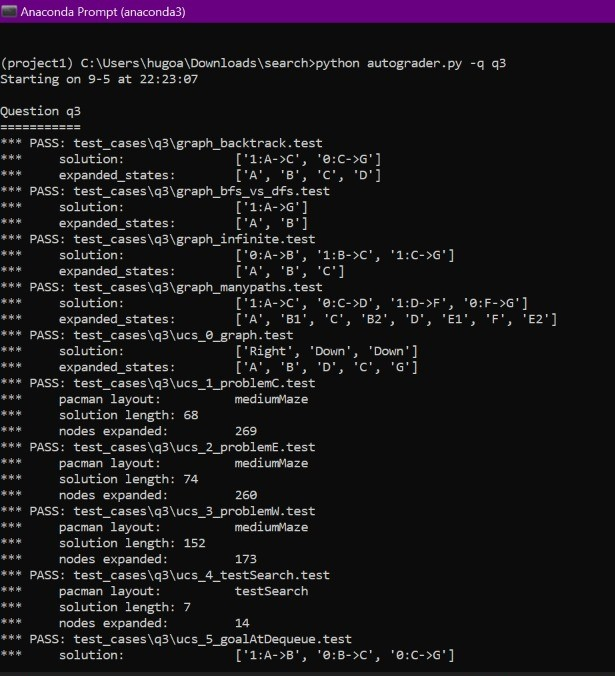

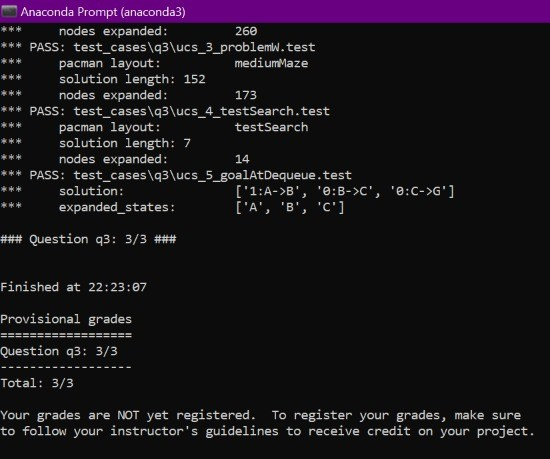

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=37acc2e3-fb2e-445d-92f6-046aec969650' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>